In [8]:
def plot_this(s,title=''):
    """

    """
    import pylab
    s = s.squeeze()
    if s.ndim ==1:
        pylab.plot(s)
    else:
        pylab.imshow(s,aspect='auto')
        pylab.title(title)
    pylab.show()

import torch 
def calculate_scaling_factor(clean_audio, noise_audio, target_snr):
    """Calculate the scaling factor to adjust noise to the target SNR level."""
    target_snr = float(target_snr)
    clean_power = torch.mean(clean_audio**2)
    noise_power = torch.mean(noise_audio**2)
    desired_noise_power = clean_power / (10 ** (target_snr / 10))
    scaling_factor = torch.sqrt(desired_noise_power / noise_power)
    return scaling_factor

In [9]:
import torch
import torchaudio
noise1 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/noises/noise_fileid_6.wav"
noise_1, sr = torchaudio.load(noise1)
noise_1.shape
noise2 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/noises/noise_fileid_18.wav"
noise_2, sr = torchaudio.load(noise2)
noise_2.shape

torch.Size([1, 4699904])

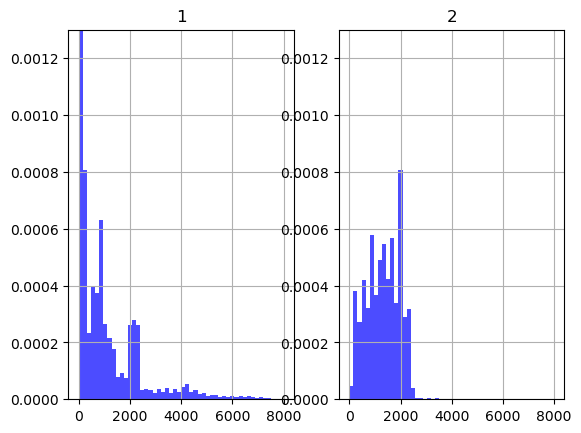

In [16]:
import scipy.signal as signal
from matplotlib import pyplot as plt

freqs1, magnitudes1 = signal.welch(noise_1.squeeze().cpu().detach().numpy(), fs=16000)
freqs, magnitudes = signal.welch(noise_2.squeeze().detach().cpu(), fs=16000)
limit = 0.0013
figure, axis = plt.subplots(1,2)
axis[0].hist(freqs1, bins=50, weights=magnitudes1, density=True, color='b', alpha=0.7)
axis[0].set_title('1')
axis[0].grid(True)
axis[0].set_ylim(0.0, limit)
axis[1].hist(freqs, bins=50, weights=magnitudes, density=True, color='b', alpha=0.7)
axis[1].set_title('2')
axis[1].grid(True)
axis[1].set_ylim(0.0, limit)

plt.show()

In [17]:
clean1 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/clean_wav/LJ050-0275_fileid_6.wav"
clean_1, sr = torchaudio.load(clean1)
torch.mean(clean_1**2)

tensor(0.0036)

In [18]:
clean2 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/clean_wav/p376_409_mic1_fileid_18.flac"
clean_2, sr = torchaudio.load(clean2)
torch.mean(clean_2**2)

tensor(0.0003)

In [20]:
mine = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o_net17/clean_wav/clean_fileid_6.wav"
mine, sr = torchaudio.load(mine)
torch.mean(mine**2)

tensor(0.0012)

In [ ]:
factor1 =  calculate_scaling_factor(clean_1, noise_1, 5)
factor2 =  calculate_scaling_factor(clean_2, noise_2, 5)
factor1, factor2

(tensor(0.4536), tensor(0.0892))

mean, std: 0.0003012028140338376 0.00011748608815495108


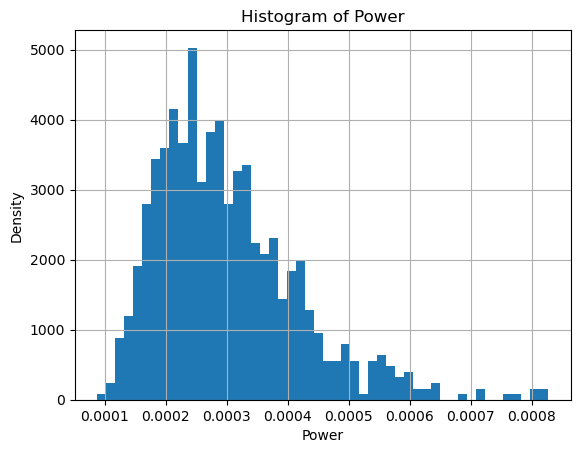

In [28]:
import os
vctk = "/data/ephraim/datasets/vctk/VCTK-Corpus-0.92/wav48_silence_trimmed/p376/"
files = os.listdir(vctk)
powers = []
for f in files:
    if f.endswith(".flac"):
        wav, sr = torchaudio.load(os.path.join(vctk, f))
        powers.append(torch.mean(wav**2).item())

#calc std and mean for the power
import numpy as np
mean = np.mean(powers)
std = np.std(powers)
print("mean, std:",mean, std)
#plot the histogram
plt.hist(powers, bins=50, density=True)
plt.title('Histogram of Power')
plt.xlabel('Power')
plt.ylabel('Density')
plt.grid(True)
plt.show()


13097


mean, std: 0.004386842364678159 0.0012897568584185693


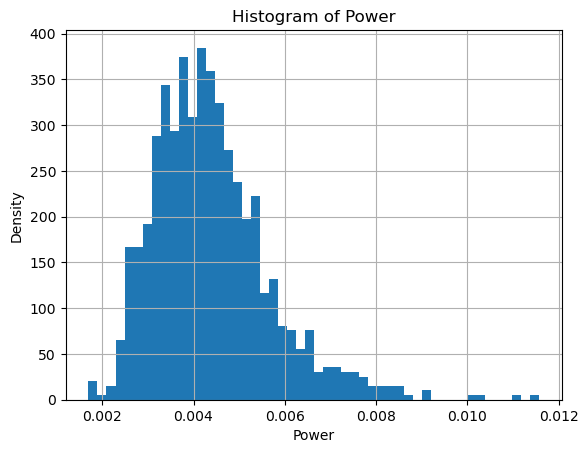

In [30]:
import os
LJSpeech = "/data/ephraim/datasets/LJSpeech-1.1/wavs/"
files = os.listdir(LJSpeech)
print(len(files))
powers = []
counter=0
for f in files:
    if f.endswith(".wav"):
        counter+=1
        if counter > 1000:
            break
        wav, sr = torchaudio.load(os.path.join(LJSpeech, f))
        powers.append(torch.mean(wav**2).item())

#calc std and mean for the power
import numpy as np
mean = np.mean(powers)
std = np.std(powers)
print("mean, std:",mean, std)
#plot the histogram
plt.hist(powers, bins=50, density=True)
plt.title('Histogram of Power')
plt.xlabel('Power')
plt.ylabel('Density')
plt.grid(True)
plt.show()
